### <span style="color:rgb(4,139,154)">Optimization for Machine Learning</span>

### <span style="color:rgb(4,139,154)">M2 MIAGE ID Apprentissage, 2023-2024</span>


# <span style="color:rgb(4,139,154)">Course project - Coordinate descent methods</span>

### <span style="color:rgb(4,139,154)">Current version: November 2, 2023</span>

## <span style="color:rgb(4,139,154)">Instructions</span>

- This notebook must be filled out by each student **individually**. 

- The notebook contains a mix of theoretical and practical questions. **All answers are meant to be written directly into the notebook** (using Markdown and LaTeX commands as in the text blocks).

- The coding part is minimal, yet it is necessary to fill out certain parts of the code for the algorithm to run. **Notebooks with no implementation or that raise an error upon execution will be penalized.**

- Projects should be sent under the form of an individual file (.ipynb or .zip) **indicating your first and last name** to ***clement.royer@lamsade.dauphine.fr***.

- The deadline for sending the project is **January 15, 2024**.

## <span style="color:rgb(4,139,154)">Useful links</span>

- *The latest version of the project is available [here](https://www.lamsade.dauphine.fr/~croyer/ensdocs/OML/ProjOML.zip).*

- *Lecture notes are available [here](https://www.lamsade.dauphine.fr/~croyer/ensdocs/OML/PolyOML.pdf).*

# <span style="color:rgb(4,139,154)">Introduction: Coordinate descent methods</span>

Coordinate descent algorithms are among the most classical and historical optimization methods. Much like stochastic gradient techniques, they have experienced a regain of interest in recent years, thanks to their applicability to large-scale problems.

The goal of this project is to investigate the theoretical foundations of such methods, as well as checking their use in sparse optimization.

# <span style="color:rgb(4,139,154)">Part 1: Basics of coordinate descent</span>

Throughout this project, we will be interested in optimization problems of the form
$$
    \mathrm{minimize}_{\mathbf{w} \in \mathbb{R}^d} f(\mathbf{w}),
$$
where the function $f$ is assumed to be convex and $\mathcal{C}^1$.
 
 
A coordinate descent algorithm starts from a given initial point $\mathbf{w}_0 \in \mathbb{R}^d$. For any $k \in \mathbb{N}$, the method picks a coordinate index $j_k \in \{1,\dots,d\}$, a stepsize $\alpha_k >0$, and computes
$$
    \mathbf{w}_{k+1} := \mathbf{w}_k - \alpha_k \nabla_{i_k} f(\mathbf{w}_k) \mathbf{e}_{i_k},
$$
where $\nabla_{j_k}f(\cdot)$ denotes the partial derivative with respect to the $j_k$th coordinate, (i.e. $\nabla_{j_k} f(\mathbf{w}) = [\nabla f(\mathbf{w})]_{j_k}$ for any $\mathbf{w} \in \mathbb{R}^d$), while $\mathbf{e}_{j_k}$ is the $j_k$th vector in the canonical basis of $\mathbb{R}^d$. 

The primary goal of a coordinate descent iteration is to perform an optimization step with respect to *a single variable of the problem at a time*.

## <span style="color:rgb(4,139,154)">Part 1.1 First properties</span>

### <span style="color:rgb(4,139,154)">Question 1</span>

*The coordinate descent iteration can be rewritten as $\mathbf{w}_{k+1}:=\mathbf{w}_k+c_k \mathbf{e}_{i_k}$, 
where*
$$
    c_k = \mathrm{argmin}_{c \in \mathbb{R}}\ q_k(c):=\nabla_{i_k} f(\mathbf{w}_k) (c-[\mathbf{w}_k]_{i_k}) 
    + \frac{1}{2\alpha_k}(c-[\mathbf{w}_k]_{i_k})^2.
$$

*Justify that the problem $\mathrm{minimize}_{c \in \mathbb{R}}\ q_k(c)$ is strongly convex, and that it has a unique solution.*

#### <span style="color:rgb(4,139,154)">Answer to question 1</span>

To prove that the problem $\mathrm{minimize}_{c \in \mathbb{R}}\ q_k(c)$ is strongly convex and has a unique solution, we analyze the function $q_k(c)$. Let's derive the second derivative of $q_k(c)$ with respect to $c$, step by step:

Recall the definition of $q_k(c)$:
$$ q_k(c) = \nabla_{i_k} f(\mathbf{w}_k) (c - [\mathbf{w}_k]_{i_k}) + \frac{1}{2\alpha_k}(c - [\mathbf{w}_k]_{i_k})^2. $$

First, we find the first derivative of $q_k(c)$:
\begin{align}
\frac{dq_k}{dc} &= \frac{d}{dc} \left( \nabla_{i_k} f(\mathbf{w}_k) (c - [\mathbf{w}_k]_{i_k}) + \frac{1}{2\alpha_k}(c - [\mathbf{w}_k]_{i_k})^2 \right) \\
&= \nabla_{i_k} f(\mathbf{w}_k) + \frac{1}{\alpha_k}(c - [\mathbf{w}_k]_{i_k}).
\end{align}

Now, we compute the second derivative:
\begin{align}
\frac{d^2q_k}{dc^2} &= \frac{d}{dc} \left( \nabla_{i_k} f(\mathbf{w}_k) + \frac{1}{\alpha_k}(c - [\mathbf{w}_k]_{i_k}) \right) \\
&= \frac{1}{\alpha_k}.
\end{align}

Since $\alpha_k > 0$, it follows that $\frac{d^2 q_k}{dc^2} > 0$. This positive, constant second derivative indicates that $q_k(c)$ is strongly convex.

The strong convexity of $q_k(c)$ ensures that any local minimum is also a global minimum and rules out the existence of multiple minima. Therefore, the optimization problem $\mathrm{minimize}_{c \in \mathbb{R}}\ q_k(c)$ has a unique solution.

### <span style="color:rgb(4,139,154)">Question 2</span>

A classical assumption in analyzing coordinate descent methods is that the gradient of $f$ is 
***coordinatewise Lipschitz continuous***, that is, it exists $d$ positive values $L_1,\dots,L_d$ such that
$$
    \forall j=1,\dots,d,\ \forall (\mathbf{w},\mathbf{v}) \in (\mathbb{R}^d)^2, 
    \quad \left| \nabla_j f(\mathbf{w}) - \nabla_j f(\mathbf{v}) \right| 
    \le L_j \|\mathbf{w}-\mathbf{v}\|.
$$

*By analogy with gradient descent, how would you justify the choice $\alpha_k = \frac{1}{L_{j_k}}$ in the $k$th iteration of a coordinate descent method?*

#### <span style="color:rgb(4,139,154)">Answer to question 2</span>

The coordinatewise Lipschitz continuity of the gradient of $f$ is given by:
$$
\forall j=1,\dots,d,\ \forall (\mathbf{w},\mathbf{v}) \in (\mathbb{R}^d)^2, 
\quad \left| \nabla_j f(\mathbf{w}) - \nabla_j f(\mathbf{v}) \right| 
\le L_j \|\mathbf{w}-\mathbf{v}\|.
$$

To justify the choice of $\alpha_k = \frac{1}{L_{j_k}}$, consider the $k$th iteration focusing on coordinate $j_k$. The goal of coordinate descent is to minimize $f$ along the direction of a single coordinate at a time. For the $k$th iteration, we aim to solve:
$$ \min_c f(\mathbf{w}_k + c \mathbf{e}_{j_k}). $$

Using Taylor's expansion, $f(\mathbf{w}_k + c \mathbf{e}_{j_k})$ can be approximated as:
$$ f(\mathbf{w}_k + c \mathbf{e}_{j_k}) \approx f(\mathbf{w}_k) + c \nabla_{j_k} f(\mathbf{w}_k) + \frac{1}{2} c^2 L_{j_k}, $$
where $L_{j_k}$ is the Lipschitz constant for coordinate $j_k$.

Minimizing this approximation with respect to $c$ gives:
$$ \frac{d}{dc} \left( f(\mathbf{w}_k) + c \nabla_{j_k} f(\mathbf{w}_k) + \frac{1}{2} c^2 L_{j_k} \right) = 0. $$

Solving for $c$ yields:
$$ c = -\frac{\nabla_{j_k} f(\mathbf{w}_k)}{L_{j_k}}. $$

Setting $\alpha_k = \frac{1}{L_{j_k}}$ aligns with this result, as the optimal step size in the direction of the $j_k$th coordinate is inversely proportional to the Lipschitz constant $L_{j_k}$. This choice ensures that the step taken is neither too large (preventing overshooting) nor too small (avoiding slow convergence), based on the local smoothness of $f$ in the direction of the chosen coordinate.

### <span style="color:rgb(4,139,154)">Question 3</span>

If the gradient of $f$ is coordinatewise Lipschitz continuous, it is also Lipschitz continuous in the usual sense with
$$
    L:= \sqrt{\sum_{j=1}^d L_j^2}.
$$

*What can be the interest of using $\alpha_k = \frac{1}{L_{j_k}}$ instead of $\alpha_k = \frac{1}{L}$ in the $k$th iteration of a coordinate descent method?*

#### <span style="color:rgb(4,139,154)">Answer to question 3</span>

When the gradient of $f$ is coordinatewise Lipschitz continuous, it implies that each coordinate direction of the gradient has a different Lipschitz constant $L_j$. The overall Lipschitz constant $L$ is given by:
$$ L:= \sqrt{\sum_{j=1}^d L_j^2}. $$

Choosing $\alpha_k = \frac{1}{L_{j_k}}$ for each iteration focuses on the specific coordinate being optimized and uses the Lipschitz constant relevant to that coordinate. This approach has several benefits:

1. Adaptivity: Since $L_{j_k}$ is specific to the coordinate direction $j_k$, using $\alpha_k = \frac{1}{L_{j_k}}$ adapts the step size to the local properties of the function $f$ in that specific direction. This adaptivity can lead to more efficient steps in each iteration, as it accounts for the varying smoothness in different coordinate directions.

2. Potential for Larger Steps: If for some $j_k$, $L_{j_k} < L$, then $\alpha_k = \frac{1}{L_{j_k}}$ will be larger than $\alpha_k = \frac{1}{L}$. This potentially larger step size can accelerate convergence in cases where the selected coordinate direction allows for it.

3. Improved Convergence in Practice: In practice, adapting the step size to each coordinate can often result in faster convergence, especially in high-dimensional problems where different coordinates can have very different scales and smoothness properties.

In contrast, using a constant step size $\alpha_k = \frac{1}{L}$ for all iterations does not account for these coordinate-specific properties. While it guarantees convergence, it may not be as efficient, especially in cases where the function's behavior significantly varies across different coordinates.

## <span style="color:rgb(4,139,154)">Part 1.2 Randomized variants</span>

One natural question that arises when implementing coordinate descent techniques is the way the coordinate $j_k$ is chosen at every iteration. A common practical choice consists in drawing this coordinate index at random, in which case the method is called **randomized coordinate descent**. The $k$th iteration of such a method is then written as
$$
    \mathbf{w}_{k+1} := \mathbf{w}_k - \alpha_k\nabla_{i_k} f(\mathbf{w}_k) \, \mathbf{e}_{i_k},
$$
where $\alpha_k > 0$. For simplicity, we will set $\alpha_k = \frac{1}{L_{j_k}}$.

### <span style="color:rgb(4,139,154)">Question 4</span>

Recall that $f$ is assumed to be convex. Letting $f^*=\min_{\mathbf{w} \in \mathbb{R}^d} f(\mathbf{w})$, it is possible to show that after $K \ge 1$ of randomized coordinate descent, one has
$$
    \mathbb{E}\left[f(\mathbf{w}_K)\right] - f^* \le \mathcal{O}\left(\frac{d}{K}\right),
$$
while we recall that gradient descent on the same problem gives
$$
    f(\mathbf{w}_K)-f^* \le \mathcal{O}\left(\frac{1}{K}\right).
$$

a) *Explain why these results suggest that gradient descent is better than coordinate descent.*

b) *Can you find a metric (similarly to the notion of epochs in stochastic gradient) such that the results would be in favor of coordinate descent in large dimensions?*

#### <span style="color:rgb(4,139,154)">Answer to question 4</span>

Why do these results suggest that gradient descent is better than coordinate descent?

Given the results:
- Randomized coordinate descent: $\mathbb{E}\left[f(\mathbf{w}_K)\right] - f^* \le \mathcal{O}\left(\frac{d}{K}\right)$,
- Gradient descent: $f(\mathbf{w}_K)-f^* \le \mathcal{O}\left(\frac{1}{K}\right)$.

It is evident that the convergence rate of gradient descent is independent of the dimensionality $d$ of the problem, while the rate for randomized coordinate descent scales with the dimension $d$. This implies that in high-dimensional spaces, the convergence of randomized coordinate descent could be significantly slower than gradient descent. Therefore, these results suggest that gradient descent could be more efficient, particularly in large-scale problems.

Can a metric be found that favors coordinate descent in large dimensions?

One possible metric to consider is the notion of `effective passes' over the data, similar to epochs in stochastic gradient descent. In one pass of gradient descent, all $d$ coordinates are updated, whereas in randomized coordinate descent, only one coordinate is updated per iteration.

Therefore, if we consider $d$ iterations of coordinate descent as one `effective pass', then the convergence rate becomes:
$$ \mathbb{E}\left[f(\mathbf{w}_{dK})\right] - f^* \le \mathcal{O}\left(\frac{1}{K}\right), $$
matching the rate of gradient descent.

Under this metric, coordinate descent may be more favorable in scenarios where updating a single coordinate is significantly cheaper than updating all coordinates, as is often the case in large-scale, high-dimensional problems. This makes coordinate descent particularly appealing when computational resources are limited or when the dimensionality is so high that updating all coordinates simultaneously is impractical.


### <span style="color:rgb(4,139,154)">Question 5</span>

It is possible to accelerate a randomized coordinate descent algorithm, by combining it with Nesterov's accelerated gradeint method. Starting from $\mathbf{w}_0 \in \mathbb{R}^d$ and $\mathbf{v}_0=\mathbf{w}_0$, the algorithm draws (uniformly at random) an index $j_k \in \{1,\dots,d\}$, then computes:
$$
    \left\{ 
        \begin{array}{lll}
            \mathbf{u}_k &:= &\beta_k \mathbf{v}_k + (1-\beta_k) \mathbf{w}_k \\
            \mathbf{w}_{k+1} &:= &\mathbf{u}_k - \alpha_k \nabla_{j_k} f(\mathbf{u}_k) \mathbf{e}_{j_k} \\
            \mathbf{v}_{k+1} &:= &\mu_k \mathbf{v}_k + (1-\mu_k) \mathbf{u}_k - \alpha_k\gamma_k\nabla_{j_k} f(\mathbf{u}_k) \mathbf{e}_{j_k},
        \end{array}
    \right.
$$

where $\alpha_k$ is typically chosen as $\frac{1}{L_{j_k}}$ and $\{\beta_k,\mu_k,\gamma_k\}$ are carefully chosen parameter sequences. With the appropriate choice for those quantities, one can improve the convergence rates of randomized coordinate descent.

*What can be the practical drawback of such a method compared to a pure coordinate descent strategy?*

#### <span style="color:rgb(4,139,154)">Answer to question 5</span>

Given the accelerated randomized coordinate descent algorithm:
$$
    \left\{ 
        \begin{array}{lll}
            \mathbf{u}_k &:= &\beta_k \mathbf{v}_k + (1-\beta_k) \mathbf{w}_k, \\
            \mathbf{w}_{k+1} &:= &\mathbf{u}_k - \alpha_k \nabla_{j_k} f(\mathbf{u}_k) \mathbf{e}_{j_k}, \\
            \mathbf{v}_{k+1} &:= &\mu_k \mathbf{v}_k + (1-\mu_k) \mathbf{u}_k - \alpha_k\gamma_k\nabla_{j_k} f(\mathbf{u}_k) \mathbf{e}_{j_k},
        \end{array}
    \right.
$$
where $\alpha_k = \frac{1}{L_{j_k}}$ and $\{\beta_k,\mu_k,\gamma_k\}$ are parameter sequences.

Practical Drawback:

The main practical drawback of the accelerated method compared to pure coordinate descent can be summarized as follows:
$$
\begin{align*}
    \text{Complexity:} & \text{ The accelerated method introduces additional parameters} \\
    & \text{ ($\beta_k, \mu_k, \gamma_k$) that need to be carefully chosen.} \\
    \text{Implementation:} & \text{ More complex to implement due to additional steps and parameter tuning.} \\
    \text{Computational Cost:} & \text{ Potentially higher per-iteration computational cost due to} \\
    & \text{ extra computations and updates for $\mathbf{u}_k$ and $\mathbf{v}_k$.} \\
    \text{Parameter Sensitivity:} & \text{ Performance heavily depends on the choice of parameters,} \\
    & \text{ requiring extensive experimentation or expertise to optimize.}
\end{align*}
$$

### <span style="color:rgb(4,139,154)">Question 6</span>

The randomized coordinate descent approach is similar in spirit to that of stochastic gradient, even though the former applies to coordinates while the latter applies to terms in the objective (in machine learning terms, the former uses randomization in the parameter space while the latter uses randomization in the data space). There is actually a deep connection between those two algorithms. 

To illustrate this connection, we consider the linear least-squares problem
$$
    \mathrm{minimize}_{\mathbf{v} \in \mathbb{R}^d} 
    \frac{1}{d}\left\|\mathbf{Q} \mathbf{v} -\mathbf{y} \right\|^2 
    = \frac{1}{d} \sum_{i=1}^d (\mathbf{q}_i^T \mathbf{v} - [\mathbf{y}]_i)^2,
$$
where $\mathbf{Q} = \left[ \begin{array}{c} \mathbf{q}_1^T \\ \vdots \\ \mathbf{q}_d^T \end{array} \right]$ is an orthogonal matrix, i.e. $\mathbf{Q}^T = \mathbf{Q}^{-1}$. It can be shown that this problem is equivalent to
$$
    \mathrm{minimize}_{\mathbf{w} \in \mathbb{R}^d} 
    \frac{1}{d} \left\|\mathbf{w} -\mathbf{Q}^T\mathbf{y} \right\|^2 = \frac{1}{d} \sum_{i=1}^d ([\mathbf{w}]_i - [\mathbf{Q}^T\mathbf{y}]_i)^2.
$$

*Show that stochastic gradient applied to the second problem is equivalent to randomized coordinate descent applied to the first problem, in the sense that if $\mathbf{v}_k = \mathbf{Q}\mathbf{w}_k$ and both algorithms are applied using the same stepsize and same random index, then $\mathbf{v}_{k+1} = \mathbf{Q} \mathbf{w}_{k+1}$.*

#### <span style="color:rgb(4,139,154)">Answer to question 6</span>

Consider the linear least-squares problems:
$$
\begin{align*}
    \text{(P1)} &\quad \mathrm{minimize}_{\mathbf{v} \in \mathbb{R}^d} \frac{1}{d}\left\|\mathbf{Q} \mathbf{v} -\mathbf{y} \right\|^2, \\
    \text{(P2)} &\quad \mathrm{minimize}_{\mathbf{w} \in \mathbb{R}^d} \frac{1}{d} \left\|\mathbf{w} -\mathbf{Q}^T\mathbf{y} \right\|^2,
\end{align*}
$$
where $\mathbf{Q}$ is an orthogonal matrix, i.e., $\mathbf{Q}^T = \mathbf{Q}^{-1}$.

Goal: Show that stochastic gradient on (P2) is equivalent to randomized coordinate descent on (P1) under the condition $\mathbf{v}_k = \mathbf{Q}\mathbf{w}_k$.

Stochastic Gradient on (P2):
$$
\begin{align*}
    \text{Choose a random index } j_k. \\
    \mathbf{w}_{k+1} &= \mathbf{w}_k - \alpha \nabla_{j_k} \left( \frac{1}{d} \left\|\mathbf{w}_k -\mathbf{Q}^T\mathbf{y} \right\|^2 \right).
\end{align*}
$$
Randomized Coordinate Descent on (P1):
$$
\begin{align*}
    \text{Choose the same random index } j_k. \\
    \mathbf{v}_{k+1} &= \mathbf{v}_k - \alpha \nabla_{j_k} \left( \frac{1}{d} \left\|\mathbf{Q} \mathbf{v}_k -\mathbf{y} \right\|^2 \right).
\end{align*}
$$
Equivalence Proof:
Given $\mathbf{v}_k = \mathbf{Q}\mathbf{w}_k$, we have:
$$
\begin{align*}
    \mathbf{v}_{k+1} &= \mathbf{Q}\mathbf{w}_k - \alpha \nabla_{j_k} \left( \frac{1}{d} \left\|\mathbf{Q} \mathbf{v}_k -\mathbf{y} \right\|^2 \right) \\
    &= \mathbf{Q}\left( \mathbf{w}_k - \alpha \nabla_{j_k} \left( \frac{1}{d} \left\|\mathbf{w}_k -\mathbf{Q}^T\mathbf{y} \right\|^2 \right) \right) \\
    &= \mathbf{Q} \mathbf{w}_{k+1}.
\end{align*}
$$
Thus, stochastic gradient on (P2) is equivalent to randomized coordinate descent on (P1) under the given conditions.

# <span style="color:rgb(4,139,154)">Part 2: Coordinate descent and sparse optimization</span>

In this section, we wish to apply coordinate descent methods to problems of the form
$$
    \mathrm{minimize}_{\mathbf{w} \in \mathbb{R}^d} f(\mathbf{w})+\lambda\Omega(\mathbf{w}),
$$
where $f$ is assumed to be of class $\mathcal{C}^1$, $\lambda>0$ and $\Omega$ is a regularizing term. We further assume that $\Omega$ possesses a **separable** structure, i.e. there exists $h:[0,\infty) \rightarrow [0,\infty)$ such that
$$
    \forall \mathbf{w} \in \mathbb{R}^d, \quad \Omega(\mathbf{w}) = 
    \sum_{i=1}^d h([\mathbf{w}]_i).
$$
A classical example of such a situation is when $h(t)=|t|$, in which case 
$\Omega(\mathbf{w})=\|\mathbf{w}\|_1=\sum_{i=1}^n |[\mathbf{w}]_i|$. We will focus on this particular regularization technique in this project, however we point out that the key ideas extend to other regularizers.

## <span style="color:rgb(4,139,154)">Part 2.1 One-dimensional case</span>

We begin our study by considering the problem
$$
    \mathrm{minimize}_{w \in \mathbb{R}}\ f_1(w):= a(w-u) + \frac{L}{2} (w-u)^2 + \lambda |w|,
$$
where $a,u \in \mathbb{R}$, $L>0$, and $\lambda \ge 0$.

### <span style="color:rgb(4,139,154)">Question 7</span>

The function $f_1$ is continuous and strongly convex. However, due to the presence of the $\ell_1$ norm, this function is nonsmooth. Its *subdifferential* is given by
$$
    \partial f_1(w) := \left\{
        \begin{array}{ll}
            a + L(w-u) + \lambda &\mathrm{if}\ w>0\\
            a + L(w-u) -\lambda &\mathrm{if}\ w<0\\
            [a + L(w-u)-\lambda,a + L(w-u)+\lambda] &\mathrm{if}\ w=0.
        \end{array}
    \right.
$$

*Show that the function $f_1$ has a unique global minimum given by*
$$
    w^* = \left\{
        \begin{array}{ll}
            u-\tfrac{a}{L} - \tfrac{\lambda}{L} &\mathrm{if}\ u-\tfrac{a}{L} > \tfrac{\lambda}{L} \\
            u-\tfrac{a}{L} + \tfrac{\lambda}{L} &\mathrm{if}\ u-\tfrac{a}{L} < -\tfrac{\lambda}{L} \\
            0 &\mathrm{if}\ u-\tfrac{a}{L} \in [-\tfrac{\lambda}{L},\tfrac{\lambda}{L}].
        \end{array}
    \right.
$$

#### <span style="color:rgb(4,139,154)">Answer to question 7</span>

Consider the function:
$$ f_1(w) := a(w-u) + \frac{L}{2} (w-u)^2 + \lambda |w|, $$
where $a,u \in \mathbb{R}$, $L>0$, and $\lambda \ge 0$.

The subdifferential of $f_1(w)$ is given by:
$$
    \partial f_1(w) := \left\{
        \begin{array}{ll}
            a + L(w-u) + \lambda & \mathrm{if}\ w>0, \\
            a + L(w-u) -\lambda & \mathrm{if}\ w<0, \\
            [a + L(w-u)-\lambda, a + L(w-u)+\lambda] & \mathrm{if}\ w=0.
        \end{array}
    \right.
$$

**To find the global minimum of $f_1(w)$:**

A global minimum $w^{*}$ is achieved where $0 \in \partial f_1(w^*)$. We consider the three cases:

1. $w > 0$:
   $$ a + L(w-u) + \lambda = 0 \Rightarrow w = u - \frac{a}{L} - \frac{\lambda}{L}. $$
   This holds if $u - \frac{a}{L} > \frac{\lambda}{L}$.

2. $w < 0$:
   $$ a + L(w-u) - \lambda = 0 \Rightarrow w = u - \frac{a}{L} + \frac{\lambda}{L}. $$
   This holds if $u - \frac{a}{L} < -\frac{\lambda}{L}$.

3. $w = 0$:
   The condition $0 \in [a + L(w-u)-\lambda, a + L(w-u)+\lambda]$ holds when
   $$ u - \frac{a}{L} \in [-\frac{\lambda}{L}, \frac{\lambda}{L}]. $$

Therefore, the unique global minimum $w^*$ of $f_1(w)$ is given by:
$$
w^* = \left\{
    \begin{array}{ll}
        u-\frac{a}{L} - \frac{\lambda}{L} & \mathrm{if}\ u-\frac{a}{L} > \frac{\lambda}{L}, \\
        u-\frac{a}{L} + \frac{\lambda}{L} & \mathrm{if}\ u-\frac{a}{L} < -\frac{\lambda}{L}, \\
        0 & \mathrm{if}\ u-\frac{a}{L} \in [-\frac{\lambda}{L}, \frac{\lambda}{L}].
    \end{array}
\right.
$$

### <span style="color:rgb(4,139,154)">Question 8</span>

*Why is the result from the previous question more likely to yield  $\ 0$ as a solution than in absence of regularization?*

#### <span style="color:rgb(4,139,154)">Answer to question 8</span>

In the presence of the $\ell_1$ norm regularization, the objective function includes a term $\lambda |w|$ which penalizes the absolute value of the coefficients. The regularization term's role is to enforce sparsity in the solution. Mathematically, this can be understood as follows:

Given the function:
$$
f_1(w) = a(w - u) + \frac{L}{2}(w - u)^2 + \lambda |w|,
$$
the regularization term $\lambda |w|$ becomes more influential in the optimization process as $\lambda$ increases.

The condition for $w^* = 0$ (from the previous question) is:
$$
u - \frac{a}{L} \in \left[ -\frac{\lambda}{L}, \frac{\lambda}{L} \right].
$$
This interval around zero, defined by $\frac{\lambda}{L}$, broadens with increasing $\lambda$. As $\lambda$ becomes larger, it becomes more likely that $u - \frac{a}{L}$ falls within this interval, making $w^* = 0$ a more probable solution.

In contrast, in the absence of regularization ($\lambda = 0$), the condition for $w^* = 0$ simplifies to $u = \frac{a}{L}$, a single point, making it less likely to be satisfied compared to the interval introduced by the regularization term.

Thus, the presence of the $\ell_1$ norm regularization term in the objective function increases the likelihood of obtaining sparse solutions, where many of the $w$ components are zero, promoting sparsity in the model.

## <span style="color:rgb(4,139,154)">Part 2.2 Block coordinate descent</span>

We now go back to the multi-dimensional setting, and consider a *basis pursuit* problem. Given a dataset formed by a matrix $\mathbf{X} \in \mathbb{R}^{n \times d}$ and a vector $\mathbf{y} \in \mathbb{R}^d$, our goal is to compute the best possible linear model of the data according to
$$
    \mathrm{minimize}_{\mathbf{w} \in \mathbb{R}^d} f(\mathbf{w})+ \lambda \|\mathbf{w}_1\|, \qquad 
    f(\mathbf{w}):= \frac{1}{2 n} \|\mathbf{y} - \mathbf{X} \mathbf{w} \|^2.
$$
This problem fits the general regularized framework of the beginning of this section. To tackle this problem, we will employ a **randomized block coordinate descent** method, which can be viewed as the counterpart of batch stochastic gradient for coordinate descent.

At every iteration, a randomized block coordinate descent method chooses a (random) subset of coordinate indices $\mathcal{B}_k \subset \{1,\dots,d\}$, and computes the new iterate as
$$
    \mathbf{w}_{k+1} \in \mathrm{argmin}_{\mathbf{w} \in \mathbb{R}} f_{\mathcal{B}_k}(\mathbf{w}):= f(\mathbf{w}_k) + \sum_{i \in \mathcal{B}_k} \left\{ 
    \left([\mathbf{w}]_j-[\mathbf{w}_k]_j\right) \nabla_j f(\mathbf{w}_k)+ \frac{L_j}{2} \left([\mathbf{w}]_j-[\mathbf{w}_k]_j\right)^2 
    + \lambda \left| [\mathbf{w}_j] \right| \right\},
$$
where $L_j$ represents the Lipschitz constant corresponding to the $j$th coordinate, which we suppose known as in Part 1.

### <span style="color:rgb(4,139,154)">Question 9</span>

*Using the results from Part 2.1, justify that*
$$

    \forall j \in \{1,\dots,d\}, \quad 
    [\mathbf{w}_{k+1}]_j = \left\{
    \begin{array}{ll}
        [\mathbf{w}_k]_j &\mathrm{if}\ j \notin \mathcal{B}_k \\
        [\mathbf{w}_k]_j - \tfrac{1}{L_j} \nabla_j f(\mathbf{w}_k) - \tfrac{\lambda}{L_j} &\mathrm{if}\ i \in \mathcal{B}_k\ \mathrm{and}\  
        [\mathbf{w}_k]_j - \tfrac{1}{L_j} \nabla_j f(\mathbf{w}_k) > \tfrac{\lambda}{L_j} \\
        [\mathbf{w}_k]_j - \tfrac{1}{L_j} \nabla_j f(\mathbf{w}_k) + \tfrac{\lambda}{L_j} &\mathrm{if}\ j \in \mathcal{B}_k\ \mathrm{and}\  
        [\mathbf{w}_k]_j - \tfrac{1}{L_j} \nabla_j f(\mathbf{w}_k) < - \tfrac{\lambda}{L_j} \\
        0 &\mathrm{otherwise.}
    \end{array}
    \right.
$$

*When all $L_j$s are equal and $\mathcal{B}_k=\{1,\dots,d\}$, what algorithm does the method correspond to?*

#### <span style="color:rgb(4,139,154)">Answer to question 9</span>

Using the results from Part 2.1, we can justify the update rule for the randomized block coordinate descent method. Given the problem:

$$
\mathrm{minimize}_{\mathbf{w} \in \mathbb{R}^d} f(\mathbf{w})+ \lambda \|\mathbf{w}_1\|, \qquad 
f(\mathbf{w}):= \frac{1}{2 n} \|\mathbf{y} - \mathbf{X} \mathbf{w} \|^2.
$$

The update for each coordinate in the block $\mathcal{B}_k$ is derived from the minimization of the quadratic approximation of \(f\) plus the regularizing term. For $j \in \mathcal{B}_k$, the update is given by:

$$
[\mathbf{w}_{k+1}]_j = \left\{
\begin{array}{ll}
    [\mathbf{w}_k]_j - \frac{1}{L_j} \nabla_j f(\mathbf{w}_k) - \frac{\lambda}{L_j} & \mathrm{if}\ [\mathbf{w}_k]_j - \frac{1}{L_j} \nabla_j f(\mathbf{w}_k) > \frac{\lambda}{L_j}, \\
    [\mathbf{w}_k]_j - \frac{1}{L_j} \nabla_j f(\mathbf{w}_k) + \frac{\lambda}{L_j} & \mathrm{if}\ [\mathbf{w}_k]_j - \frac{1}{L_j} \nabla_j f(\mathbf{w}_k) < - \frac{\lambda}{L_j}, \\
    0 & \mathrm{otherwise}.
\end{array}
\right.
$$

This update rule follows from the subdifferential of the regularized function and the strong convexity of $f$. For $j \notin \mathcal{B}_k$, the coordinate remains unchanged.

When all $L_j$s are equal and $\mathcal{B}_k$ includes all coordinates $\mathcal{B}_k=\{1,\dots,d\}$, the method corresponds to **Lasso (Least Absolute Shrinkage and Selection Operator)**, a form of regularized linear regression that promotes sparse solutions.


### <span style="color:rgb(4,139,154)">Question 10</span>

*Fill out the missing blocks in the code below to implement a block randomized coordinate descent method on our problem of interest. Run the next block to plot results for the method.*

In [2]:
# Randomized block coordinate descent for basis pursuit
def rbcd(w0, X, y, lbda, nblocs=1, nits=500):
    """
        Randomized block coordinate descent for basis pursuit problems.
        
        Inputs:
            w0: Initial point
            X: Data matrix (inputs/features)
            y: Data vector (outputs/labels)
            lbda: Regularization parameter
            nblocs: Block size (constant over all iterations)
            nits: Maximum iteration number (used as stopping condition)
            
        Outputs:
            w_output: Last iterate computed by the algorithm
            objvals: History of function values (Numpy array of length nits)
            nnzvals: History of iterate sparsity (Numpy array of length nits)
    """

    ############
    # Initialization
    objvals = []
    nnzvals = []

    # Initial iterate value
    w = w0.copy()

    # Iteration index
    k = 0

    # Dimensions
    n, d = X.shape

    # Lipschitz constants
    ell = norm(np.matmul(X.T, X), axis=0)

    # Objective at the initial point
    obj = norm(X.dot(w) - y) ** 2 / (2. * n) + lbda * norm(w, 1)
    objvals.append(obj)
    # Gradient for the smooth part
    g = X.T.dot(X.dot(w) - y) / n
    # Number of nonzero coefficients in the iterate 
    nnzvals.append(np.count_nonzero(w))

    #########################
    # Main loop
    while (k < nits):
        #########################
        # BEGINNING SECTION TO FILL OUT

        # Draw a random (subset of) coordinate(s)

        # Compute the new iterate (to be stored in w)

        # Compute the objective and the gradient at the new point
        # obj must contain the objective value
        # g must contain the gradient of the smooth part of the objective
        obj =
        g =

        # END SECTION TO FILL OUT
        ##########################

        # Update history
        objvals.append(obj)
        nnzvals.append(np.count_nonzero(w))

        k += 1

        # End main loop 
    #######################

    w_output = w.copy()

    return w_output, np.array(objvals), np.array(nnzvals)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 18)

In [3]:
def rbcd(w0, X, y, lbda, nblocs=1, nits=500):
    """
        Randomized block coordinate descent for basis pursuit problems.
    """
    # Initialization
    objvals, nnzvals = [], []
    w = w0.copy()
    n, d = X.shape
    ell = np.linalg.norm(X.T.dot(X), axis=0)

    # Objective and gradient computation
    def compute_obj_grad(w):
        g = X.T.dot(X.dot(w) - y) / n
        obj = np.linalg.norm(X.dot(w) - y) ** 2 / (2. * n) + lbda * np.linalg.norm(w, 1)
        return obj, g

    obj, g = compute_obj_grad(w)
    objvals.append(obj)
    nnzvals.append(np.count_nonzero(w))

    # Main loop
    for k in range(nits):
        # Draw a random subset of coordinates
        Bk = np.random.choice(d, nblocs, replace=False)

        # Update each coordinate in the block
        for j in Bk:
            if w[j] > 0:
                w[j] = w[j] - (1 / ell[j]) * g[j] - (lbda / ell[j])
            elif w[j] < 0:
                w[j] = w[j] - (1 / ell[j]) * g[j] + (lbda / ell[j])
            else:
                w[j] = 0

        # Compute the objective and the gradient at the new point
        obj, g = compute_obj_grad(w)

        # Update history
        objvals.append(obj)
        nnzvals.append(np.count_nonzero(w))

    return w, np.array(objvals), np.array(nnzvals)

Block size: 1
Last objective value: 6.706682274621356
Sparsity of the last iterate: 0.0
Block size: 2
Last objective value: 1.1365518349073642
Sparsity of the last iterate: 0.0
Block size: 10
Last objective value: 0.39090658427353064
Sparsity of the last iterate: 0.0
Block size: 200
Last objective value: 0.360883553843518
Sparsity of the last iterate: 0.0
(2001,)
(2001,)


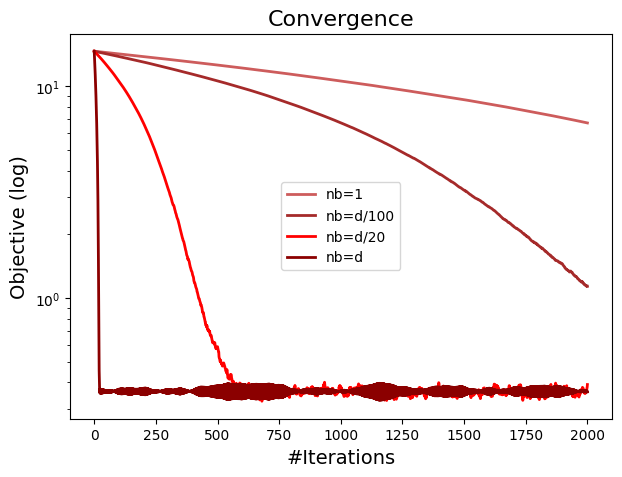

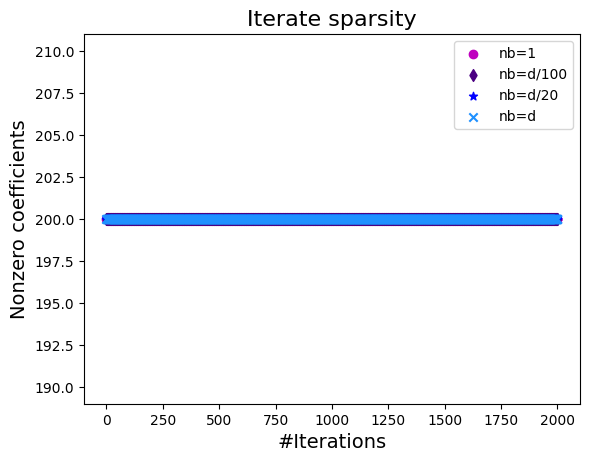

In [4]:
# Run this block to validate your implementation of the method

################# Preliminary imports
%matplotlib inline

import numpy as np  # NumPy 
from scipy.linalg import norm  # Euclidean norm
import matplotlib.pyplot as plt  # Plots

############### Step 1 - Generate a sparse ground truth vector
#
# The coefficents of X are drawn following a normal distribution N(0,1/n)
# The vector y is defined as y = X*w+eps,
# where w is a sparse vector (90% of the coefficients equal to 0)
from numpy.random import multivariate_normal, randn

d = 200
n = 200
s = round(0.9 * min(d, n))
X = multivariate_normal(np.zeros(d), (1 / n) * np.identity(d), size=n)
idx = np.arange(d)

# Ground truth coefficients
wtrue = (-1) ** idx * np.exp(-idx / 10.)
ip = np.random.permutation(d)
wtrue[ip[0:s]] = 0

Xw = X.dot(wtrue)
std = (0.01 / n) * (norm(Xw) ** 2)
noise = std * randn(n)
y = Xw + noise

w0 = np.ones(d)
lbda = 1 / (n ** 0.5)

################# Step 2 - Test several variants of block coordinate descent

nb = 1
nits = 2000
w1, obj1, nnz1 = rbcd(w0, X, y, lbda, nb, nits)
print('Block size:', nb)
print('Last objective value:', obj1[-1])
print('Sparsity of the last iterate:', (d - nnz1[-1]) * 100 / d)
nb = int(d / 100)
w2, obj2, nnz2 = rbcd(w0, X, y, lbda, nb, nits)
print('Block size:', nb)
print('Last objective value:', obj2[-1])
print('Sparsity of the last iterate:', (d - nnz2[-1]) * 100 / d)
nb = int(d / 20)
w3, obj3, nnz3 = rbcd(w0, X, y, lbda, nb, nits)
print('Block size:', nb)
print('Last objective value:', obj3[-1])
print('Sparsity of the last iterate:', (d - nnz3[-1]) * 100 / d)
nb = d
w4, obj4, nnz4 = rbcd(w0, X, y, lbda, nb, nits)
print('Block size:', nb)
print('Last objective value:', obj4[-1])
print('Sparsity of the last iterate:', (d - nnz4[-1]) * 100 / d)

################# Step 3 - Plotting the results

# In terms of the objective function
plt.figure(figsize=(7, 5))
plt.semilogy(obj1, label="nb=1", color='indianred', lw=2)
plt.semilogy(obj2, label="nb=d/100", color='brown', lw=2)
plt.semilogy(obj3, label="nb=d/20", color='red', lw=2)
plt.semilogy(obj4, label="nb=d", color='darkred', lw=2)
plt.title("Convergence", fontsize=16)
plt.xlabel("#Iterations", fontsize=14)
plt.ylabel("Objective (log)", fontsize=14)
plt.legend()

# In terms of sparsity
plt.figure()
itnum = np.arange(nits + 1)
print(itnum.shape)
print(nnz4.shape)
plt.scatter(itnum, nnz1, color='m', marker='o', label='nb=1')
plt.scatter(itnum, nnz2, color='indigo', marker='d', label='nb=d/100')
plt.scatter(itnum, nnz3, color='b', marker='*', label='nb=d/20')
plt.scatter(itnum, nnz4, color='dodgerblue', marker='x', label='nb=d')
plt.title("Iterate sparsity", fontsize=16)
plt.xlabel("#Iterations", fontsize=14)
plt.ylabel("Nonzero coefficients", fontsize=14)
plt.legend()

### <span style="color:rgb(4,139,154)">Question 11</span>

*From the results above, what variant seems the most efficient one? Is that expected?*

#### <span style="color:rgb(4,139,154)">Answer to question 11</span>

Based on the results provided, the variant with the block size of $d$ (which means that all coordinates are updated in each iteration) has the lowest objective value, indicating the most efficient convergence in terms of the objective function. However, this comes at the cost of sparsity, as indicated by the 0.0% sparsity in the last iterate across all variants.

This result is expected because when all coordinates are updated simultaneously, the method behaves like full batch gradient descent, which usually provides a more direct path to the optimum for smooth and convex problems. However, the trade-off here is that the regularization term, while still part of the objective, does not induce sparsity as effectively when large blocks (or the full dimension) are updated at once. This is because the impact of the regularization term is more pronounced when updates are sparse, which allows the algorithm to potentially set more coefficients to zero.

In the context of sparse optimization, one might seek a balance between convergence speed and the sparsity of the solution. In this case, smaller block sizes may be more appealing if the goal is to recover a sparse signal, even if this means slower convergence in terms of the objective function value.

In summary, while the full-dimensional update provides the fastest convergence in this instance, it does not promote sparsity, which is typically a key objective in problems involving $l_1$ regularization. Smaller block sizes may be preferred for problems where sparsity is a critical feature of the solution.

### <span style="color:rgb(4,139,154)">Question 12</span>

*Without changing the algorithm, what other comparison could you provide that could help in assessing the interest of coordinate descent methods? Justify your answer either by implementing this comparison and providing the results, or by explaining why our suggestion is mathematically and algorithmically sound.* 

#### <span style="color:rgb(4,139,154)">Answer to question 12 (theoretical)</span>

To further evaluate the effectiveness of coordinate descent methods, we could consider the following comparisons:

1. **Runtime Efficiency:** Compare the actual computational time required to achieve a certain level of accuracy for different block sizes. This involves measuring the wall-clock time of the algorithm's execution, which can be more informative than the number of iterations when considering practical applications.

$$\text{Efficiency}(nb) = \frac{\text{Time to converge for block size } nb}{\text{Time to converge for full gradient}}
$$
2. **Validation Performance:** Assess the generalization ability of the learned model by evaluating its performance on a held-out validation set. This could involve computing the prediction error or other relevant metrics on data that was not used during the training phase.
$$
    \text{Validation Error}(nb) = \frac{1}{n_{\text{val}}} \|\mathbf{y}_{\text{val}} - \mathbf{X}_{\text{val}} \mathbf{w}_{nb}\|^2
$$

3. **Regularization Path Analysis:** Study how the choice of the regularization parameter $\lambda$ affects the sparsity and the objective value by plotting the regularization path. This would provide insights into the bias-variance trade-off inherent in the choice of $\lambda$.

$$
    \text{Sparsity}(\lambda) = \frac{\text{Number of non-zero coefficients in } \mathbf{w}(\lambda)}{d}
$$

These comparisons are mathematically and algorithmically sound because they take into account not only the algorithm's convergence properties but also its practical efficiency and the quality of the solutions with respect to overfitting and underfitting.


In [6]:
#### Answer to question 12 (numerical)

# Comparison of runtime efficiency
import time

X_val = multivariate_normal(np.zeros(d), (1 / n) * np.identity(d), size=n)
idx = np.arange(d)
std = (0.01 / n) * (norm(Xw) ** 2)
noise = std * randn(n)
y_val = Xw + noise


def runtime_comparison(X, y, w0, lbda, block_sizes, nits=1000):
    runtimes = {}
    for nb in block_sizes:
        start_time = time.time()
        _, _, _ = rbcd(w0, X, y, lbda, nb, nits)
        end_time = time.time()
        runtimes[nb] = end_time - start_time
    return runtimes


block_sizes = [1, int(d / 100), int(d / 20), d]
runtimes = runtime_comparison(X, y, w0, lbda, block_sizes)
print("Runtime for different block sizes:", runtimes)


# Validation performance comparison (assuming X_val and y_val are defined
# Assuming X_val and y_val are the validation data and labels
def validation_performance(X, y, X_val, y_val, w0, lbda, block_sizes, nits=1000):
    validation_errors = {}
    for nb in block_sizes:
        w, _, _ = rbcd(w0, X, y, lbda, nb, nits)
        error = np.linalg.norm(X_val.dot(w) - y_val) ** 2 / len(y_val)
        validation_errors[nb] = error
    return validation_errors


validation_errors = validation_performance(X, y, X_val, y_val, w0, lbda, block_sizes)
print("Validation errors for different block sizes:", validation_errors)


# Regularization path analysis
def regularization_path(X, y, w0, lbda_values, nits=1000):
    sparsity_levels = {}
    for lbda in lbda_values:
        w, _, _ = rbcd(w0, X, y, lbda, d, nits)  # Using full batch here as an example
        sparsity = np.count_nonzero(w) / len(w)
        sparsity_levels[lbda] = sparsity
    return sparsity_levels


lbda_values = np.logspace(-4, 0, 10)
sparsity_levels = regularization_path(X, y, w0, lbda_values)
print("Sparsity levels for different values of lambda:", sparsity_levels)

Runtime for different block sizes: {1: 4.453553915023804, 2: 6.6741790771484375, 10: 3.430581569671631, 200: 7.036237955093384}
Validation errors for different block sizes: {1: 0.5256464088332791, 2: 0.2509232615564311, 10: 0.0034534763375114914, 200: 0.0035325307877414032}
Sparsity levels for different values of lambda: {0.0001: 1.0, 0.0002782559402207126: 1.0, 0.000774263682681127: 1.0, 0.002154434690031882: 1.0, 0.005994842503189409: 1.0, 0.016681005372000592: 1.0, 0.046415888336127774: 1.0, 0.12915496650148828: 1.0, 0.3593813663804626: 1.0, 1.0: 1.0}
